In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


In [2]:
head = ["label","1","2","3","4","5","6","7","8","9"]
train_dat = pd.read_csv("data/landsat_train.csv", header=None, names = head)

vali_dat = pd.read_csv("data/landsat_validation.csv", header=None, names = head)
train_dat.head()


,label,1,2,3,4,5,6,7,8,9
0,6,2696,2416,2179,1412,3882,1988,1407,1025,4867
1,6,2691,2413,2177,1406,3879,1986,1408,1023,4856
2,6,2690,2413,2178,1404,3880,1988,1411,1023,4852
3,6,2691,2415,2184,1405,3878,1998,1420,1025,4851
4,6,2706,2428,2201,1413,3891,2021,1436,1033,4874


In [3]:
y = train_dat["label"]
X = train_dat[head[1:]]

rf = RandomForestClassifier(n_estimators = 10, criterion = "gini",bootstrap = True)
rf.fit(X,y)

RandomForestClassifier(n_estimators=10)

In [4]:
pred = rf.predict(vali_dat[head[1:]])

In [5]:
tf = 0
for p,t in zip(pred,np.array(vali_dat["label"])):
    tf += int(t == p)
    
print(tf/len(pred))

0.7441795863601581


In [6]:
landsat_dat = pd.read_csv("data/landsat_area.csv", header=None, names = head[1:])

pred_area = rf.predict(landsat_dat)


In [7]:

draw_area = pred_area.reshape((3000,len(pred_area)//3000))

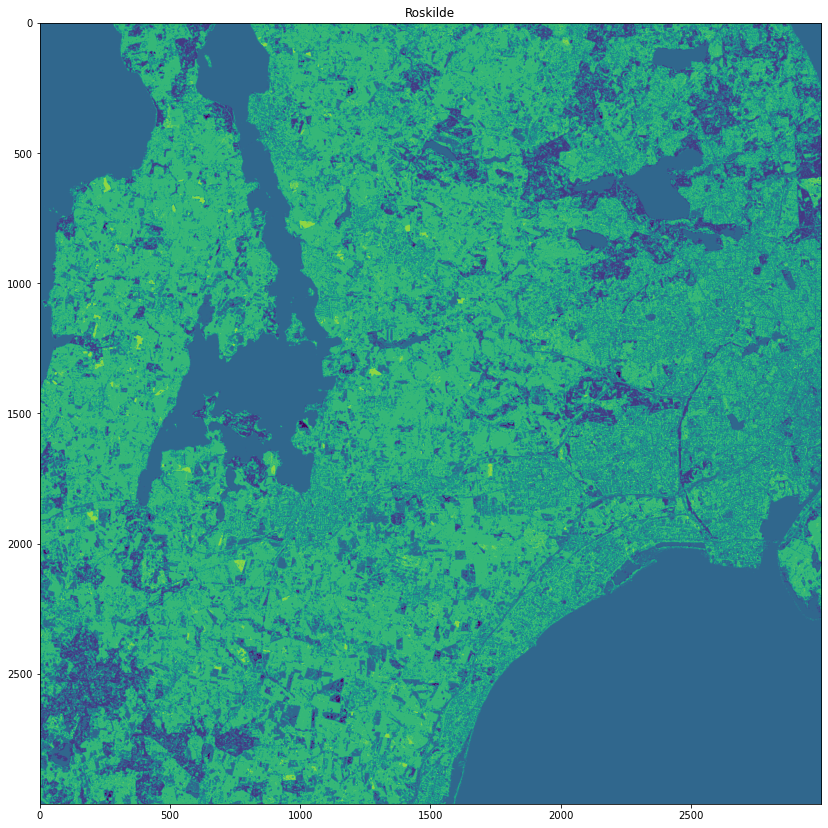

In [8]:
plt.figure(figsize = (14,15))
plt.imshow(draw_area)
plt.title("Roskilde")
plt.show()
#Roskilde